# Tarea 5: Física Estadística

### Briones Andrade Joshua

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.special import comb

In [2]:
# Constantes
eps_0 = 8.854187817e-12 #F/m
K_B   = 1.3806503e-23   #J/K

def Omega(N,q):
    return float(comb(q + N - 1, q, exact=True, repetition=True))

def S_norm(N,q):
    return np.log(Omega(N,q))

def T_inv(N,q):
    t1 = K_B/eps_0
    t2 = np.log(1+N/q)
    return t1*t2

def E_int(q):
    return q*eps_0

In [3]:
N_A = 300;
N_B = 200;
q_tot = 100;

datos_a = np.array([(q, Omega(N_A, q), S_norm(N_A, q), T_inv(N_A, q), E_int(q)) for q in range(1,q_tot+1)]);
datos_b = np.array([(q_tot-q, Omega(N_B, q_tot-q), S_norm(N_B, q_tot-q), T_inv(N_B, q_tot-q), E_int(q_tot-q))
                    for q in range(0,q_tot)]);

datos_a.shape, datos_b.shape
# tabla_a[:,0], tabla_b[:,0]

((100, 5), (100, 5))

In [4]:
tabla_a = pd.DataFrame(datos_a, columns=[r"$q_A$", "$\Omega(N_A, q_A)$", "$S/k_B$", "$1/T$", "$U_a$"])
tabla_a

,$q_A$,"$\Omega(N_A, q_A)$",$S/k_B$,$1/T$,$U_a$
0,1.0,3.000000e+02,5.703782,8.899205e-12,8.854188e-12
1,2.0,4.545100e+04,10.724390,7.823540e-12,1.770838e-11
2,3.0,4.636304e+06,15.349428,7.196445e-12,2.656256e-11
3,4.0,3.582005e+08,19.696604,6.752995e-12,3.541675e-11
4,5.0,2.235644e+10,23.830380,6.410164e-12,4.427094e-11
...,...,...,...,...,...
95,96.0,8.496867e+103,239.305962,2.209658e-12,8.500020e-10
96,97.0,5.357184e+104,241.147288,2.197432e-12,8.588562e-10
97,98.0,3.361934e+105,242.983951,2.185361e-12,8.677104e-10
98,99.0,2.100150e+106,244.816029,2.173444e-12,8.765646e-10


In [5]:
tabla_b = pd.DataFrame(datos_b, columns=[r"$q_B$", "$\Omega(N_B, q_B)$", "$S/k_B$", "$1/T$", "$U_b$"])
tabla_b

,$q_B$,"$\Omega(N_B, q_B)$",$S/k_B$,$1/T$,$U_b$
0,100.0,1.259990e+96,221.279273,1.713087e-12,8.854188e-10
1,99.0,2.376346e+95,219.611148,1.723552e-12,8.765646e-10
2,98.0,4.466929e+94,217.939700,1.734159e-12,8.677104e-10
3,97.0,8.368317e+93,216.264866,1.744911e-12,8.588562e-10
4,96.0,1.562317e+93,214.586583,1.755811e-12,8.500020e-10
...,...,...,...,...,...
95,5.0,3.091033e+09,21.851771,5.790643e-12,4.427094e-11
96,4.0,7.286786e+07,18.104158,6.130970e-12,3.541675e-11
97,3.0,1.394204e+06,14.147834,6.571896e-12,2.656256e-11
98,2.0,2.030100e+04,9.918425,7.196445e-12,1.770838e-11


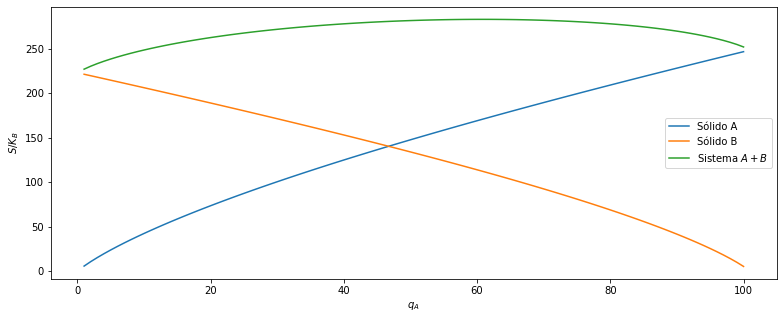

In [6]:
plt.figure(figsize=(13,5))
plt.plot(datos_a[:,0], datos_a[:,2], label=r"Sólido A")
plt.plot(datos_a[:,0], datos_b[:,2], label=r"Sólido B")
plt.plot(datos_a[:,0], datos_a[:,2]+datos_b[:,2], label=r"Sistema $A+B$")
plt.xlabel(r"$q_A$"); plt.ylabel(r"$S/K_B$");
plt.legend(); plt.show()

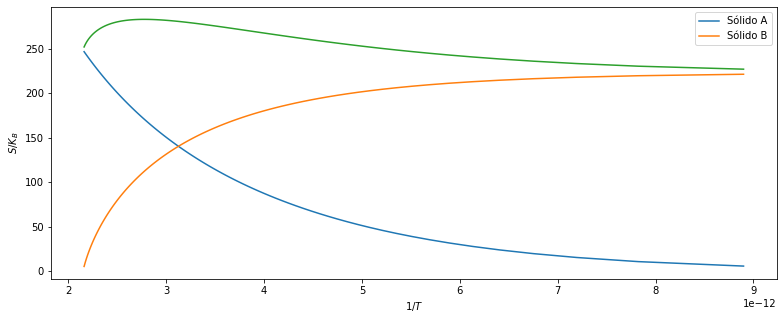

In [7]:
plt.figure(figsize=(13,5))
plt.plot(datos_a[:,3], datos_a[:,2], label=r"Sólido A")
plt.plot(datos_a[:,3], datos_b[:,2], label=r"Sólido B")
# plt.vlines(3.127e-12, 0, 250, colors='r', linestyles='solid', label=r'$1/T=3.127\cdot 10^{-12}$')
plt.plot(datos_a[:,3], datos_a[:,2]+datos_b[:,2])
plt.xlabel(r"$1/T$"); plt.ylabel(r"$S/K_B$");
plt.legend(); plt.show()

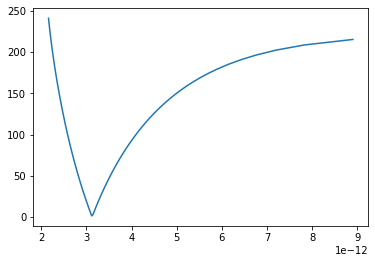

In [8]:
# Se puede visualizar mejor la existencia del mínimo 
plt.plot(datos_a[:,3], abs(datos_a[:,2]-datos_b[:,2]), label=r"Sólido B")

In [9]:
np.amin(abs(datos_a[:,2]-datos_b[:,2]))

1.1951059032814442

In [10]:
result = np.where(abs(datos_a[:,2]-datos_b[:,2]) == np.amin(abs(datos_a[:,2]-datos_b[:,2])))
result

(array([46], dtype=int64),)

In [13]:
f"La temperatura donde las entropias son iguales es 1/T= {datos_a[result[0][0],3]}"

'La temperatura donde las entropias son iguales es 1/T= 3.1173548923214494e-12'

In [12]:
f"La entropía total normalizada es: {datos_a[result[0][0],2]+ datos_b[result[0][0],2]}"

'La entropía total normalizada es: 280.75074296723295'